# Make plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [2]:
# Add ids and comment out others when using
princeton_id = 'aa8417'
#princeton_id = 'ns5404'
#princeton_id = 'jf...'

project_dir = f'/scratch/gpfs/{princeton_id}/QCB557_project'

model_name = 'fine_tune_full_v0'
model_out_dir = f'{project_dir}/models/{model_name}'

### Training and validation loss curves

In [ ]:
# read the log
log_df = pd.read_csv(f'{project_dir}/model_output/log_{model_name}.csv')

# plot the loss curve
epoch = log_df['epoch'].unique()[:-1]
train = log_df['loss'].dropna()
validation = log_df['eval_loss'].dropna()

plt.plot(epoch, train, label='training loss')
plt.plot(epoch, validation, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training and validation loss curve')

plt.legend()
plt.show()

### Validation accuracy

In [ ]:
# plot the accuracy curve

valid_acc = log_df['eval_accuracy'].dropna()

plt.plot(epoch, valid_acc, label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training and validation accuracy curves')

plt.legend()
plt.show()

### Validaton precision and recall

In [ ]:
# plot other metrics
valid_prec = log_df['eval_precision'].dropna()
valid_rec = log_df['eval_recall'].dropna()

plt.plot(epoch, valid_prec, label='precision')
plt.plot(epoch, valid_rec, label='recall')
plt.xlabel('epoch')
plt.ylabel('precision/recall')
plt.title('precision and recall during validation')

plt.legend()
plt.show()

### Test metrics

In [ ]:
results_df = pd.read_csv(f'{project_dir}/model_output/results_{model_name}.csv')

In [ ]:
results_df

In [ ]:
true_labels = results_df['true_labels']
predicted_labels = results_df['predicted_labels']

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

### Layer freezing experiment plots for training and validation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
layers = range(0, 13)
lr = '1e-7'

all_train_data = {}

In [43]:
for layer in layers:
    model_name = f'fine_tune_parallel_v{layer}'
    log = pd.read_csv(f'/scratch/gpfs/aa8417/QCB557_project/model_output/parallel_{lr}_041624/log_{model_name}.csv')
    
    epoch = log['epoch'].unique()[:-1]
    train_loss = np.array(log['loss'].dropna())
    valid_loss = np.array(log['eval_loss'].dropna())
    eval_accuracy = np.array(log['eval_accuracy'].dropna())
    eval_precision = np.array(log['eval_precision'].dropna())
    eval_recall = np.array(log['eval_recall'].dropna())
    eval_f1 = np.array(log['eval_f1'].dropna())
    
    all_train_data[model_name] = {'epoch': epoch, 'train_loss': train_loss, 'valid_loss': valid_loss, 
                                  'eval_accuracy': eval_accuracy, 'eval_precision': eval_precision, 'eval_recall': eval_recall,
                                  'eval_f1': eval_f1}

In [44]:
all_train_data

{'fine_tune_parallel_v0': {'epoch': array([ 1.07,  2.15,  3.22,  4.29,  5.36,  6.44,  7.51,  8.58,  9.66,
         10.73, 11.8 , 12.88, 13.95, 15.02, 16.09, 17.17, 18.24, 19.31,
         20.39, 21.46, 22.53, 23.61, 24.68, 25.75, 26.82, 27.9 , 28.97,
         30.04, 31.12, 32.19, 33.26, 34.33, 35.41, 36.48, 37.55, 38.63,
         39.7 , 40.77, 41.85, 42.92, 43.99, 45.06, 46.14, 47.21, 48.28,
         49.36, 50.43, 51.5 , 52.58, 53.65, 54.72, 55.79, 56.87, 57.94,
         59.01, 60.09, 61.16, 62.23, 63.3 , 64.38, 65.45, 66.52, 67.6 ,
         68.67, 69.74, 70.82, 71.89, 72.96, 74.03, 75.11, 76.18, 77.25,
         78.33, 79.4 , 80.47, 81.55, 82.62, 83.69, 84.76, 85.84, 86.91,
         87.98, 89.06, 90.13, 91.2 , 92.27, 93.35, 94.42, 95.49, 96.57,
         97.64, 98.71, 99.79]),
  'train_loss': array([0.6935, 0.6933, 0.6932, 0.6934, 0.6935, 0.6928, 0.6933, 0.6929,
         0.6924, 0.6931, 0.6922, 0.6923, 0.6924, 0.6921, 0.6923, 0.6925,
         0.6922, 0.6925, 0.6917, 0.6921, 0.692 , 0.691

In [45]:
epoch = all_train_data['fine_tune_parallel_v0']['epoch']
layers = range(0, 13)

In [61]:
# train_loss, valid_loss, eval_accuracy, eval_precision, eval_recall, or eval_f1
data_type = 'eval_f1'

model_name_0 = f'fine_tune_parallel_v0'
model_name_1 = f'fine_tune_parallel_v1'
model_name_2 = f'fine_tune_parallel_v2'
model_name_3 = f'fine_tune_parallel_v3'
model_name_4 = f'fine_tune_parallel_v4'
model_name_5 = f'fine_tune_parallel_v5'
model_name_6 = f'fine_tune_parallel_v6'
model_name_7 = f'fine_tune_parallel_v7'
model_name_8 = f'fine_tune_parallel_v8'
model_name_9 = f'fine_tune_parallel_v9'
model_name_10 = f'fine_tune_parallel_v10'
model_name_11 = f'fine_tune_parallel_v11'
model_name_12 = f'fine_tune_parallel_v12'

In [62]:
data_v0 = all_train_data[model_name_0][data_type]
data_v1 = all_train_data[model_name_1][data_type]
data_v2 = all_train_data[model_name_2][data_type]
data_v3 = all_train_data[model_name_3][data_type]
data_v4 = all_train_data[model_name_4][data_type]
data_v5 = all_train_data[model_name_5][data_type]
data_v6 = all_train_data[model_name_6][data_type]
data_v7 = all_train_data[model_name_7][data_type]
data_v8 = all_train_data[model_name_8][data_type]
data_v9 = all_train_data[model_name_9][data_type]
data_v10 = all_train_data[model_name_10][data_type]
data_v11 = all_train_data[model_name_11][data_type]
data_v12 = all_train_data[model_name_12][data_type]

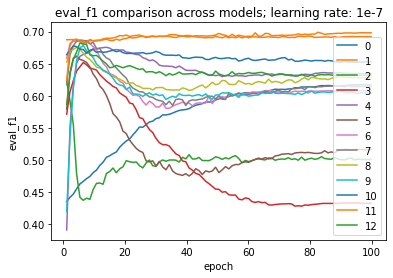

In [63]:
plt.plot(epoch, data_v0, label='0')
plt.plot(epoch, data_v1, label='1')
plt.plot(epoch, data_v2, label='2')
plt.plot(epoch, data_v3, label='3')
plt.plot(epoch, data_v4, label='4')
plt.plot(epoch, data_v5, label='5')
plt.plot(epoch, data_v6, label='6')
plt.plot(epoch, data_v7, label='7')
plt.plot(epoch, data_v8, label='8')
plt.plot(epoch, data_v9, label='9')
plt.plot(epoch, data_v10, label='10')
plt.plot(epoch, data_v11, label='11')
plt.plot(epoch, data_v12, label='12')

plt.xlabel('epoch')
plt.ylabel(f'{data_type}')
plt.title(f'{data_type} comparison across models; learning rate: {lr}')
plt.legend(title='num of unfrozen pretrained layers')
plt.legend()
plt.show()

### Layer freezing experiment plots for testing

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [65]:
layers = range(0, 13)

all_test_data = {}

In [66]:
for layer in layers:
    model_name = f'fine_tune_parallel_v{layer}'
    results = pd.read_csv(f'/scratch/gpfs/aa8417/QCB557_project/model_output/parallel_{lr}_041624/results_{model_name}.csv')
    
    true_labels = results['true_labels']
    predicted_labels = results['predicted_labels']
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    all_test_data[model_name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'f1': f1}

In [73]:
# accuracy, precision, recall, f1
data_type = 'f1'

model_name_0 = f'fine_tune_parallel_v0'
model_name_1 = f'fine_tune_parallel_v1'
model_name_2 = f'fine_tune_parallel_v2'
model_name_3 = f'fine_tune_parallel_v3'
model_name_4 = f'fine_tune_parallel_v4'
model_name_5 = f'fine_tune_parallel_v5'
model_name_6 = f'fine_tune_parallel_v6'
model_name_7 = f'fine_tune_parallel_v7'
model_name_8 = f'fine_tune_parallel_v8'
model_name_9 = f'fine_tune_parallel_v9'
model_name_10 = f'fine_tune_parallel_v10'
model_name_11 = f'fine_tune_parallel_v11'
model_name_12 = f'fine_tune_parallel_v12'

data = [
    all_test_data[model_name_0][data_type],
    all_test_data[model_name_1][data_type],
    all_test_data[model_name_2][data_type],
    all_test_data[model_name_3][data_type],
    all_test_data[model_name_4][data_type],
    all_test_data[model_name_5][data_type],
    all_test_data[model_name_6][data_type],
    all_test_data[model_name_7][data_type],
    all_test_data[model_name_8][data_type],
    all_test_data[model_name_9][data_type],
    all_test_data[model_name_10][data_type],
    all_test_data[model_name_11][data_type],
    all_test_data[model_name_12][data_type]
]

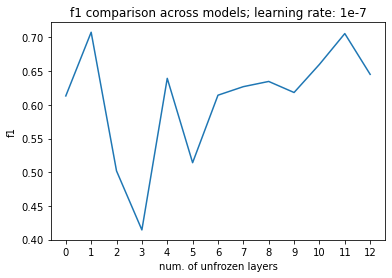

In [74]:
plt.plot(layers, data)

plt.xticks(layers)

plt.xlabel('num. of unfrozen layers')
plt.title(f'{data_type} comparison across models; learning rate: {lr}')
plt.ylabel(f'{data_type}')
plt.show()